In [57]:
%matplotlib inline
# Sistema Massa-mola

In [58]:
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

## Ajuste Linear Sinosoidal Amortecida

In [59]:
Npontos=100
t = np.arange(0,Npontos)
om = np.pi /10
lbd = 1.0/20

### Dados simulados

In [60]:
t.shape[0]
rng = np.random.default_rng()
y = np.exp(-t*lbd)* np.sin(om * t) + 0.01*rng.random(Npontos)

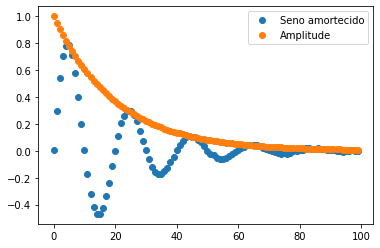

In [61]:
plt.plot(t, y, 'o', label='Seno amortecido')
plt.plot(t, np.exp(-t*lbd), 'o', label='Amplitude')
plt.legend()
plt.show()

### Funcao de Ajuste

In [62]:
def Fsina(x,a,b,c):
    return a*np.exp(-b*x)*np.sin(c*t)
def Famp(x,a,b,c):
    return a*np.exp(-b*x)

In [63]:
from scipy.optimize import curve_fit
guess = [0.4, 1.0/6, 6/4]
popt, pcov = curve_fit(Fsina, t, y, p0=guess)
#The optimised parameters of the fit
print("popt: a=%g, b=%g, c=%g" %(popt[0], popt[1], popt[2]))
#One standard deviation errors on the parameters.
perr = np.sqrt(np.diag(pcov))
print("perr:", perr)
#The covariance matrix of the parameters
print("pcov:", pcov)
print("1/Lambda: %g s" %(1.0/popt[1]))
print("Omega: %g s-1" %(1.0/popt[2]))

popt: a=1.00726, b=0.050206, c=0.314094
perr: [0.00371498 0.00025868 0.0001763 ]
pcov: [[ 1.38010877e-05  7.04489582e-07 -8.02631786e-09]
 [ 7.04489582e-07  6.69177006e-08 -5.28694549e-10]
 [-8.02631786e-09 -5.28694549e-10  3.10830238e-08]]
1/Lambda: 19.9179 s
Omega: 3.18376 s-1


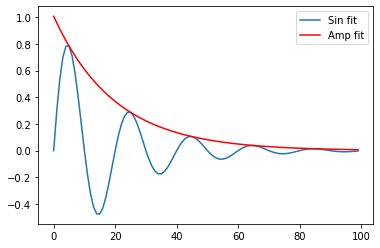

In [64]:
plt.plot(t, Fsina(t, *popt), label='Sin fit')
plt.plot(t, Famp(t, *popt), 'r', label='Amp fit')
plt.legend()
plt.show()

In [65]:
np.sqrt(np.diag(pcov))

array([0.00371498, 0.00025868, 0.0001763 ])

# Ressonância

In [66]:
f = np.array([0.138, 0.123, 0.116, 0.125, 0.116])
a = np.array([0.043, 0.045, 0.020, 0.042, 0.031])

In [67]:
m=0.150
def AmpF(w,Am,w0,l):
    return Am/np.sqrt((w-w0)**2 + 4*(l*w)**2)

In [68]:
from scipy.optimize import curve_fit
guess = [0.001, 2*np.pi*0.123, 1/90.0]
popt, pcov = curve_fit(AmpF, 2*np.pi*f, a, p0=guess)
#The optimised parameters of the fit
print("popt: Am=%g, f0=%g, Lambda=%g" %(popt[0], popt[1]/2/np.pi, popt[2]))

popt: Am=0.00288492, f0=0.131563, Lambda=0.0310953


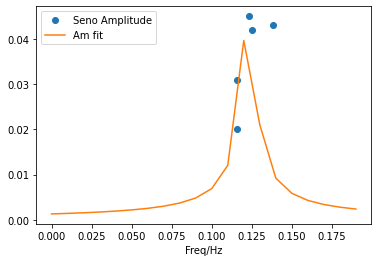

In [69]:
fs=np.arange(0.0, 0.2, 0.01)
plt.plot(f, a, 'o', label='Seno Amplitude')
#plt.plot(f, AmpF(2*np.pi*f, *popt), '-x',label='Am fit')
plt.plot(fs, AmpF(2*np.pi*fs, 0.001, 2*np.pi*0.123, 1/90.0), label='Am fit')

plt.legend()
plt.xlabel('Freq/Hz')
plt.show()